## Setup

In [1]:
# Packages
import pandas as pd
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import math

In [2]:
# Import data
tor_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_train_set.csv")


# Quick inspection
tor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11959 entries, 0 to 11958
Data columns (total 35 columns):
DAMAGE_PROPERTY       11959 non-null float64
DURATION_SECONDS      11959 non-null float64
BEGIN_LAT             11959 non-null float64
BEGIN_LON             11959 non-null float64
TOR_LENGTH            11959 non-null float64
TOR_WIDTH             11959 non-null float64
YEAR                  11959 non-null float64
MULTI_VORT_IND        11959 non-null int64
OPEN_WATER_PROP       11959 non-null float64
DEV_OPEN_PROP         11959 non-null float64
DEV_LOW_PROP          11959 non-null float64
DEV_MED_PROP          11959 non-null float64
DEV_HIGH_PROP         11959 non-null float64
BARREN_LAND_PROP      11959 non-null float64
DECID_FOREST_PROP     11959 non-null float64
EVERGR_FOREST_PROP    11959 non-null float64
MIXED_FOREST_PROP     11959 non-null float64
SHRUB_SCRUB_PROP      11959 non-null float64
GRASS_LAND_PROP       11959 non-null float64
PASTURE_HAY_PROP      11959 non-null f

In [3]:
# Seperating variables
# The dependent variables
tornado_outcomes = tor_df.iloc[:, [0]]


# Quick inspection
tornado_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11959 entries, 0 to 11958
Data columns (total 1 columns):
DAMAGE_PROPERTY    11959 non-null float64
dtypes: float64(1)
memory usage: 93.5 KB


In [4]:
# The independent variables
tornado_features = tor_df.iloc[:, 1:]


# Quick inspection
tornado_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11959 entries, 0 to 11958
Data columns (total 34 columns):
DURATION_SECONDS      11959 non-null float64
BEGIN_LAT             11959 non-null float64
BEGIN_LON             11959 non-null float64
TOR_LENGTH            11959 non-null float64
TOR_WIDTH             11959 non-null float64
YEAR                  11959 non-null float64
MULTI_VORT_IND        11959 non-null int64
OPEN_WATER_PROP       11959 non-null float64
DEV_OPEN_PROP         11959 non-null float64
DEV_LOW_PROP          11959 non-null float64
DEV_MED_PROP          11959 non-null float64
DEV_HIGH_PROP         11959 non-null float64
BARREN_LAND_PROP      11959 non-null float64
DECID_FOREST_PROP     11959 non-null float64
EVERGR_FOREST_PROP    11959 non-null float64
MIXED_FOREST_PROP     11959 non-null float64
SHRUB_SCRUB_PROP      11959 non-null float64
GRASS_LAND_PROP       11959 non-null float64
PASTURE_HAY_PROP      11959 non-null float64
CULT_CROPS_PROP       11959 non-null f

In [5]:
# Make the dependent variables into a numpy array
outcomes_array = tornado_outcomes.values


# Makes the numpy array into a torch Tensor
outcomes_Tensor = torch.from_numpy(outcomes_array)


# Quick inspection
outcomes_Tensor


 0.1532
 0.6540
 0.0873
   ⋮    
-1.4219
 0.1532
 0.2814
[torch.DoubleTensor of size 11959x1]

In [6]:
# Make the independent variables into a numpy array
features_array = tornado_features.values


# Make the numpy array into a torch Tensor
features_Tensor = torch.from_numpy(features_array)


# Quick inspection
features_Tensor


 0.0227 -1.6434 -0.4323  ...  -0.2947 -0.8098 -0.4531
-0.3046  0.2063  0.5545  ...  -0.2947  0.5157  1.1092
 0.3520 -0.3313 -0.8991  ...  -1.0297 -1.1142 -0.1038
          ...             ⋱             ...          
-2.2692  1.1642 -1.2164  ...   0.0728  0.7816 -0.5450
 0.0227 -1.2487  0.6113  ...   0.8078  0.2605 -2.1918
 0.4583 -0.4701 -0.0348  ...  -1.7647 -0.3808  0.5064
[torch.DoubleTensor of size 11959x34]

### Convert DoubleTensor to FloatTensor

In [7]:
# Changing dependent variables from a DoubleTensor to a FloatTensor
outcomes_Tensor = outcomes_Tensor.float()


# ...and for the independent variables
features_Tensor = features_Tensor.float()


# Quick check
features_Tensor


 0.0227 -1.6434 -0.4323  ...  -0.2947 -0.8098 -0.4531
-0.3046  0.2063  0.5545  ...  -0.2947  0.5157  1.1092
 0.3520 -0.3313 -0.8991  ...  -1.0297 -1.1142 -0.1038
          ...             ⋱             ...          
-2.2692  1.1642 -1.2164  ...   0.0728  0.7816 -0.5450
 0.0227 -1.2487  0.6113  ...   0.8078  0.2605 -2.1918
 0.4583 -0.4701 -0.0348  ...  -1.7647 -0.3808  0.5064
[torch.FloatTensor of size 11959x34]

## Round 1: One-Hidden-Layer Neural Network

In [8]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [9]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(34, 23),
                            torch.nn.ReLU(),
                            torch.nn.Linear(23, 1))

In [10]:
# Set the loss function
loss_fn = torch.nn.MSELoss(size_average=False)

In [11]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

In [12]:
# Get the iterations
iterations = list(range(0, 15000))

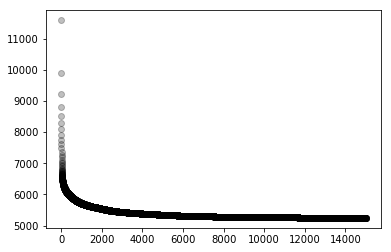

In [13]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [14]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(11959)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

In [15]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
outcomes_Variable_resized = outcomes_Variable.resize(11959)


# Make the FloatTensor into a numpy.array
outcomes_array = outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
outcomes_list = outcomes_array.tolist()

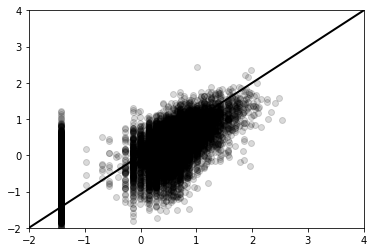

In [16]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 1.1: Validation Set Performance

In [17]:
# Import data
valid_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_cv_set.csv")


# Validation set outcomes
valid_outcomes = valid_df.iloc[:, [0]]


# Make the validation outcomes into a numpy array
valid_outcomes_array = valid_outcomes.values


# Makes the numpy array into a torch Tensor
valid_outcomes_Tensor = torch.from_numpy(valid_outcomes_array)


# Changing validation outcomes from a DoubleTensor to a FloatTensor
valid_outcomes_Tensor = valid_outcomes_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_outcomes_Variable = Variable(valid_outcomes_Tensor)


# Quick check
valid_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3987 entries, 0 to 3986
Data columns (total 1 columns):
DAMAGE_PROPERTY    3987 non-null float64
dtypes: float64(1)
memory usage: 31.2 KB


In [18]:
# Validation set predictors
valid_predictors = valid_df.iloc[:, 1:]


# Make the validation predictors into a numpy array
valid_predictors_array = valid_predictors.values


# Makes the numpy array into a torch Tensor
valid_predictors_Tensor = torch.from_numpy(valid_predictors_array)


# Changing validation predictors from a DoubleTensor to a FloatTensor
valid_predictors_Tensor = valid_predictors_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_predictors_Variable = Variable(valid_predictors_Tensor)


# Quick check
valid_predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3987 entries, 0 to 3986
Data columns (total 34 columns):
DURATION_SECONDS      3987 non-null float64
BEGIN_LAT             3987 non-null float64
BEGIN_LON             3987 non-null float64
TOR_LENGTH            3987 non-null float64
TOR_WIDTH             3987 non-null float64
YEAR                  3987 non-null float64
MULTI_VORT_IND        3987 non-null int64
OPEN_WATER_PROP       3987 non-null float64
DEV_OPEN_PROP         3987 non-null float64
DEV_LOW_PROP          3987 non-null float64
DEV_MED_PROP          3987 non-null float64
DEV_HIGH_PROP         3987 non-null float64
BARREN_LAND_PROP      3987 non-null float64
DECID_FOREST_PROP     3987 non-null float64
EVERGR_FOREST_PROP    3987 non-null float64
MIXED_FOREST_PROP     3987 non-null float64
SHRUB_SCRUB_PROP      3987 non-null float64
GRASS_LAND_PROP       3987 non-null float64
PASTURE_HAY_PROP      3987 non-null float64
CULT_CROPS_PROP       3987 non-null float64
WOOD_WETLAND_PR

In [19]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 2230.3667
[torch.FloatTensor of size 1]

In [20]:
# Computing the total sum of squares
# Get a torch Variable of the mean outcome
# Compute mean value
valid_outcomes_mean = (sum(valid_outcomes_Variable) / len(valid_outcomes_Variable))
valid_outcomes_mean = valid_outcomes_mean.data.numpy()[0]

# Make that into a ndarray
valid_outcomes_mean = np.repeat(valid_outcomes_mean, len(valid_outcomes_Variable))

# Turn the array into a torch Tensor
valid_outcomes_mean = torch.from_numpy(valid_outcomes_mean)

# Turn that Tensor into a Variable
valid_outcomes_mean_Variable = Variable(valid_outcomes_mean)

# Compute the TSS
tot_sum_squares = loss_fn(valid_outcomes_mean_Variable, valid_outcomes_Variable)


# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
 0.4332
[torch.FloatTensor of size 1]

In [21]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(3987)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

In [22]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
valid_outcomes_Variable_resized = valid_outcomes_Variable.resize(3987)


# Make the FloatTensor into a numpy.array
valid_outcomes_array = valid_outcomes_Variable_resized.data.numpy()


# Convert back to log scale
valid_outcomes_array = valid_outcomes_array*5.407597 + 7.688844


# Make the numpy.array into a list
valid_outcomes_list = valid_outcomes_array.tolist()

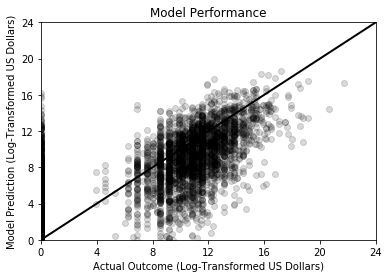

In [23]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [24]:
model[(0)].weight

Parameter containing:

Columns 0 to 5 
 2.1358e-01  1.0316e-01  3.7124e-02 -2.2593e-01  4.5233e-02  3.8389e-01
 1.5195e-01 -9.4278e-02 -8.2583e-02  5.8744e-02  2.7462e-01  2.8293e-01
 1.1352e-01 -5.5653e-02  1.8611e-01 -5.2451e-02 -1.3207e-01  4.1841e-01
 9.2388e-02 -1.8348e-01 -2.1968e-01 -1.8539e-01 -2.2196e-01  1.4041e-01
-1.3478e-01 -5.4723e-02  2.6578e-02 -2.7834e-03 -1.2775e-01  8.4176e-02
-4.1173e-01  3.8526e-01 -1.2967e-01  2.0166e-01 -1.4904e-01  3.0612e-01
-4.2260e-02 -2.1785e-03 -1.6068e-01 -2.6750e-01 -1.2827e-03 -4.7983e-02
 3.4421e-01 -6.6228e-02  2.3880e-01 -3.2774e-01  4.5880e-01 -1.9843e-01
-2.0120e-02  6.1759e-01 -2.3335e-03 -1.1923e-01  7.4465e-02  4.6151e-01
 2.0701e-01  3.9050e-01  3.2782e-01 -4.3413e-01  3.4375e-01 -2.4148e-01
 7.4409e-02  7.0452e-01  2.2312e-01  1.3948e-01 -1.8952e-02  9.7708e-02
-3.2818e-01  9.7356e-02 -3.1564e-01  1.7138e-01  1.9581e-01  4.2115e-01
-1.3703e-01 -1.8346e-01 -1.2102e-01 -1.3132e-01 -6.4014e-02 -1.7409e-01
 6.4389e-02  1.1103e-01  

In [25]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.4820  0.4325  0.4288 -0.3156 -0.5503  0.7541 -0.4587 -0.6534 -0.5923  0.6927

Columns 10 to 19 
-0.5098 -0.4784  0.5524  0.3735  0.5209  0.4170 -0.3288  0.4306 -0.5029  0.4978

Columns 20 to 22 
 0.4607 -0.4342 -0.2648
[torch.FloatTensor of size 1x23]

## Round 2: Two-Hidden-Layer Neural Network

In [26]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [27]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(34, 23),
                            torch.nn.ReLU(),
                            torch.nn.Linear(23, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 1))

In [28]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

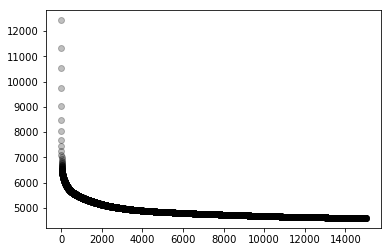

In [29]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [30]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(11959)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

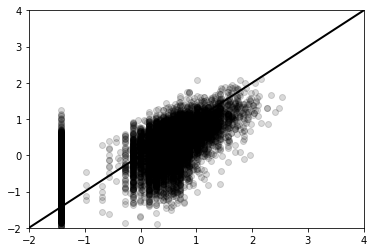

In [31]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 2.1: Validation Set Performance

In [32]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 2326.8230
[torch.FloatTensor of size 1]

In [33]:
# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
 0.4087
[torch.FloatTensor of size 1]

In [34]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(3987)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

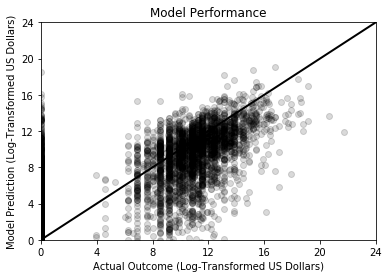

In [35]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [36]:
model[(0)].weight

Parameter containing:

Columns 0 to 5 
 4.0373e-01 -8.5796e-02 -2.9616e-03  1.3400e-02 -8.1311e-02 -3.0262e-01
 1.7308e-02 -1.8855e-01 -1.8336e-01 -1.1907e-01 -4.3143e-01 -5.1204e-05
 4.1010e-03  3.4431e-02  4.8737e-02  2.4238e-01  4.7450e-01  2.4129e-01
-7.5806e-02  5.1282e-01  1.9911e-01  3.6040e-01 -5.0336e-03  8.8684e-02
 3.2003e-01 -1.3365e-01  2.5467e-02 -7.5681e-02 -2.5933e-01  1.0229e-01
 1.9276e-01 -2.4751e-02  2.3594e-01 -2.1606e-03  2.9814e-01  2.6726e-01
-8.4900e-02  2.9674e-01  5.0629e-01 -1.0095e-01  2.6069e-01 -5.6771e-01
 2.0128e-01  3.2732e-02 -8.0762e-02 -2.4289e-01  2.2893e-02 -1.9764e-01
-3.9948e-02 -5.3190e-02  5.9095e-02  1.3696e-01  4.8230e-02 -2.0233e-01
-7.3906e-02  3.2463e-01  2.2095e-01 -1.8860e-01  5.5000e-02  2.6219e-01
-1.3999e-01 -5.9956e-01  4.3818e-01  2.2197e-01 -1.8610e-01 -5.1886e-02
 1.7242e-01  1.1817e-01 -1.6288e-01 -2.7269e-01 -2.4933e-02 -1.8940e-01
-2.1524e-01  1.3147e-01 -1.5413e-01 -8.8850e-02  2.1129e-01  3.4460e-01
-4.2696e-02  2.4469e-01 -

In [37]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.3573  0.4006  0.2610 -0.0701 -0.1888  0.0986  0.2546 -0.1730 -0.0267  0.0550
 0.0864 -0.2758  0.1527 -0.2718 -0.1689 -0.0938  0.2145  0.0996 -0.3053 -0.3857
-0.0042 -0.3710  0.3411 -0.0818 -0.1365  0.0348 -0.1493 -0.1116 -0.1450 -0.0396
 0.1746 -0.0889  0.1192 -0.2046 -0.1762 -0.1834  0.7084  0.3741 -0.1078  0.0659
-0.1374 -0.2474 -0.3789  0.1837 -0.0983  0.0752  0.1629  0.2199 -0.1248 -0.3783
 0.5120  0.2247 -0.3493  0.0860 -0.8470  0.2403 -0.3827  0.6158  0.1798  0.0729
-0.3832 -0.1296  0.0217  0.0438 -0.0158  0.3785 -0.0366  0.0907  0.1815 -0.1961
 0.1304 -0.1895  0.2678 -0.3697  0.3126 -0.6643 -0.0618  0.0349 -0.1251 -0.0105
-0.0160  0.0019 -0.4324 -0.3050  0.2021 -0.2887 -0.1023  0.1548  0.5337  0.3313
-0.6773 -0.0419  0.1451  0.0043  0.1371 -0.2518  0.1668 -0.3083  0.3996  0.0668
-0.1134 -0.3458  0.1146  0.3237 -0.0217  0.1302  0.1886 -0.0262 -0.2314  0.6819
 0.1104  0.1776 -0.2900  0.5868 -0.1116  0.5084 -0.4013  0.2139  0.0726  0.5584
 

In [38]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
 0.7420  0.5203  0.3324 -0.6027  0.5721 -1.4435  0.9426  0.7900 -0.5175  0.5718

Columns 10 to 14 
 0.4465 -0.7174  0.6471 -0.5249  0.7659
[torch.FloatTensor of size 1x15]

## Round 3: Three-Hidden-Layer Neural Network

In [39]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [40]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(34, 23),
                            torch.nn.ReLU(),
                            torch.nn.Linear(23, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 10),
                            torch.nn.ReLU(),
                            torch.nn.Linear(10, 1))

In [41]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

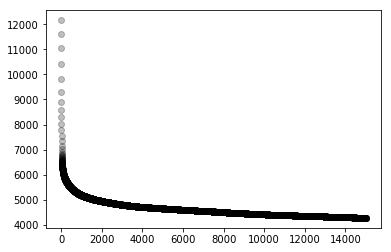

In [42]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [43]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(11959)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

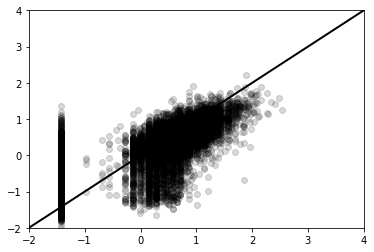

In [44]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 3.1: Validation Set Performance

In [45]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 2459.7278
[torch.FloatTensor of size 1]

In [46]:
# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
 0.3749
[torch.FloatTensor of size 1]

In [47]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(3987)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

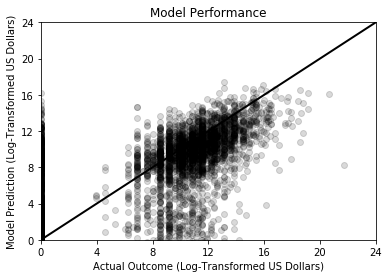

In [48]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [49]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.2634  0.0676  0.2224  0.0434 -0.4450  0.1576  1.5715 -0.2006 -0.2863  0.0349
 0.3590  0.1267 -0.2005 -0.1216  0.0863  0.2997  0.3633  0.0021 -0.1046  0.0967
 0.2955  0.1534  0.1403  0.2214 -0.2603 -0.2716  0.7233  0.1175 -0.0524 -0.0630
 0.2157  0.4785  0.0324 -0.2453 -0.0786  0.0159  0.2222 -0.0653  0.0540 -0.1464
 0.1049 -0.1163  0.0920  0.3061  0.0806 -0.2643  0.2871 -0.0938 -0.0849  0.0936
 0.0016 -0.0936  0.3544  0.1993 -0.0110 -0.0134  0.2897 -0.0393  0.0394 -0.2403
-0.0966  0.2907  0.3255 -0.1277 -0.0523 -0.2931  0.1786  0.1522  0.0104 -0.1016
-0.1764  0.3310 -0.2792 -0.1226  0.2344  0.1535  0.2344  0.1155 -0.1062  0.0608
 0.1678  0.0024  0.0856 -0.2756  0.3083  0.2261 -0.7050  0.0908  0.0407  0.0874
-0.1961 -0.3609  0.0877  0.3378 -0.1974 -0.1148 -0.0611 -0.1547  0.1606 -0.1298
-0.1500  0.3277 -0.0590 -0.0719  0.0990  0.1915  0.8233 -0.0096 -0.1978 -0.0704
 0.1169  0.1833  0.0483  0.3680  0.0773 -0.0036  0.0271  0.2367 -0.0305  0.0385
 

In [50]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.1340 -0.3169  0.0398 -0.0251  0.0692  0.2301 -0.2591  0.2448 -0.2554 -0.3092
-0.5845 -0.1075  0.4012 -0.1895  0.0326  0.2573 -0.3281 -0.3621  0.1608 -0.1553
-0.5805 -0.1978 -0.3396  0.2323  0.1480  0.2834 -0.4889  0.4881 -0.4706  0.0764
 0.1256  0.0941  0.1653  0.4782  0.1626  0.1198  0.1690  0.1882 -0.2231  0.1985
 0.2682 -0.4009 -0.1907 -0.1688  0.1118  0.3756 -0.1795 -0.1696 -0.1998 -0.4666
-0.1669  0.1307  0.0949  0.3560 -0.0380  0.2522  0.1705 -0.0565 -0.0242 -0.1268
 0.1138 -0.1686 -0.2772 -0.1751  0.1202  0.3679 -0.2163  0.2527 -0.4482 -0.5623
-0.0186 -0.4921 -0.5005 -0.2463  0.1193  0.2461 -0.4204  0.1112 -0.2451 -0.3337
 0.2174  0.0840  0.0094  0.2753  0.1902  0.1734  0.1509  0.1419 -0.1832 -0.2199
 0.0160  0.0113 -0.2515 -0.2919  0.3862  0.3005 -0.0499  0.1776 -0.3212  0.2556
 0.2491 -0.2417 -0.1223 -0.4690 -0.1575  0.1463 -0.1287 -0.0010 -0.1421  0.2418
 0.5050 -0.1833 -0.0979 -0.0728  0.1949  0.3615  0.0209 -0.1238 -0.5822 -0.3411
 

In [51]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
 0.1786  0.9114  0.1860  0.0994  0.4335  0.1295  0.2428  0.0581  0.0757  0.4490
 0.2332 -0.0409 -0.7316  0.1991 -1.0098  0.2686  0.0061 -0.5643  0.2928 -0.1019
 0.1743 -0.4084  1.2687 -0.6664  0.4992 -0.0958  0.7306  0.1673 -0.7253  0.1903
-0.7681  1.3513 -0.4189  0.3091 -0.5342 -0.1338  0.1181 -2.0710  0.1462 -0.0887
 0.3340 -1.3161  1.8923 -1.2937  0.7684 -0.1396  0.9265  0.4986 -0.2992 -0.1205
-0.0191  0.7263 -0.0435  0.3969 -0.3726  0.3902 -0.1948 -0.2583 -0.1455  0.4188
-0.0409 -0.1517  0.0534  0.0147  0.0950  0.0573 -0.1135  0.2964  0.0795 -0.2332
 0.1811 -0.6847  1.2023 -0.2384  0.4756 -0.1406  0.6504  0.3550 -0.5464  0.0758
 0.4081  0.5840 -0.5703  0.1430 -0.6243  0.2020 -0.3470 -0.5269  0.2335 -0.1308
-0.0039 -0.7522  1.0759 -0.2371  0.4269 -0.0016  0.4353  0.4601  0.1290 -0.1418

Columns 10 to 14 
 0.0850 -0.0587 -0.1124  0.1271  0.1504
 0.5863 -0.0153  0.2687 -0.2467 -0.0075
 0.0806  0.4585 -0.1593  1.4240 -0.3690
 0.5392  0.0107 -0.075

In [52]:
model[(6)].weight

Parameter containing:
 0.3689  0.5856 -1.1956 -1.3427  1.6869  0.3506 -0.1773 -0.8530  0.4686 -1.0242
[torch.FloatTensor of size 1x10]

## Round 4: Four-Hidden-Layer Neural Network

In [53]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [54]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(34, 23),
                            torch.nn.ReLU(),
                            torch.nn.Linear(23, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 10),
                            torch.nn.ReLU(),
                            torch.nn.Linear(10, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 1))

In [55]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

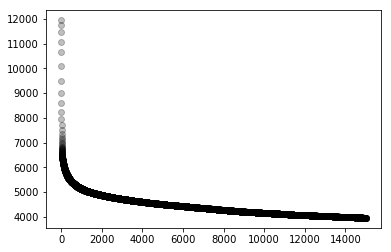

In [56]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [57]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(11959)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

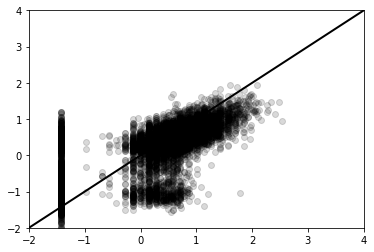

In [58]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 4.1: Validation Set Performance

In [59]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 2586.0620
[torch.FloatTensor of size 1]

In [60]:
# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
 0.3428
[torch.FloatTensor of size 1]

In [61]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(3987)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

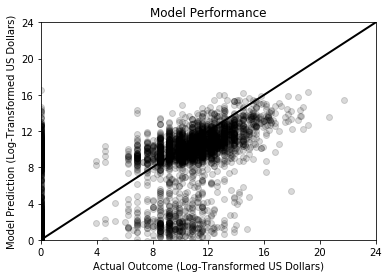

In [62]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [63]:
model[(0)].weight

Parameter containing:

Columns 0 to 5 
 2.8112e-01  3.1124e-02 -2.7094e-01 -1.2058e-01  9.3987e-02 -6.5697e-02
-1.1978e-04 -1.0681e-01 -3.4964e-01  1.5189e-01 -2.9184e-01 -1.6611e-02
 3.0364e-02 -1.1056e-01 -1.7848e-01 -1.1303e-01 -1.9698e-02  7.6107e-02
 7.8188e-02 -1.6917e-02  3.7615e-01  3.0502e-01  1.6278e-02 -1.0505e-01
 1.2513e-01  1.3003e-01 -3.9892e-01 -2.7060e-01  1.0056e-01  2.7603e-01
-1.2482e-01  1.1369e-01  2.0797e-01  3.5359e-01  1.4903e-01 -2.4251e-01
-3.0109e-01 -6.7992e-03 -2.1153e-01  1.4278e-01 -2.3501e-01 -3.5344e-02
-7.6209e-03  1.7490e-01 -2.4164e-01  1.6739e-02 -1.0552e-01  2.1695e-01
-1.3950e-01  1.3806e-01 -7.0861e-02  1.6772e-01  4.7525e-02  2.0576e-01
 8.7266e-02 -4.7303e-01  1.5454e-01  4.0676e-01  2.9223e-01 -4.1822e-01
-9.0252e-03 -3.9842e-01  1.9711e-02  4.6025e-01 -1.5751e-02 -1.3583e-01
-7.4940e-02  6.3885e-02 -5.4198e-02 -1.6720e-01  1.1047e-01 -7.9112e-02
-6.4931e-02 -1.4344e-01 -1.8330e-02  3.1670e-01 -2.4299e-01  2.0383e-02
-1.4486e-01  3.9197e-02  

In [64]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
-0.1915 -0.0307 -0.2265  0.0935  0.2703  0.2752  0.2675 -0.1202  0.1482  0.3041
 0.0474 -0.3787  0.3419 -0.1021  0.0676 -0.0631  0.3082 -0.1768  0.0992  0.0000
-0.0539  0.0458  0.0428  0.1685  0.0677 -0.0788  0.1378 -0.0241  0.1257  0.3928
 0.2557  0.2444 -0.2260  0.2129 -0.2130  0.1295  0.1055  0.3815 -0.0906  0.1342
 0.3178 -0.0816 -0.4388  0.0067  0.1709  0.0882  0.0155 -0.2779 -0.1022  0.0292
 0.2616  0.2632 -0.0257 -0.1022 -0.1053 -0.4918 -0.1670  0.1571  0.0684  0.1439
-0.1036  0.0992  0.0443  0.0738  0.2577  0.0863  0.0591  0.0065  0.3764 -0.0205
 0.1634 -0.1285  0.0871  0.0930 -0.2067  0.0227  0.2534 -0.1798  0.2558 -0.0445
-0.0987  0.2741  0.2534  0.1177  0.2090 -0.0527 -0.0372  0.2352  0.0926 -0.2164
 0.2353 -0.2876  0.0355 -0.2651 -0.1012  0.0294  0.0646 -0.3098  0.1350  0.0244
-0.1918  0.0330  0.0298  0.3548  0.0585 -0.2872 -0.0194  0.2059  0.2610 -0.1425
 0.0237 -0.0435  0.1626  0.4383  0.1311 -0.1030 -0.0391  0.2672  0.1812  0.2515
-

In [65]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
 0.2761  0.3129  0.1534  0.0136  0.2357 -0.1600  0.1171 -0.2354 -0.2768  0.5049
 0.0795 -0.0964 -0.2231  0.0476 -0.0921 -0.1543 -0.0406  0.0018 -0.1866 -0.0951
 0.2793  0.5143 -0.0376 -0.2272  0.6297 -0.5201  0.7983 -0.1946 -0.5257  0.4063
 0.2735  0.5086  0.0339 -0.2050  0.6639 -0.6378  0.8476 -0.1402 -0.5243  0.5377
 0.4093  0.2512 -0.0400 -0.4256  0.5100 -0.4390  0.6157 -0.2877 -0.3935  0.3782
-0.1778 -0.3245 -0.0633  0.3277 -0.0328  0.1345  0.0893  0.1767  0.2016 -0.3118
-0.0177  0.0305  0.3372  0.3917  0.4467 -0.4135 -0.6066  0.0709 -0.2527 -0.1562
-0.2768 -0.1086  0.3212 -0.1206 -0.2241  0.0054 -0.2445 -0.0560  0.1255 -0.1112
 0.2465  0.2260 -0.3686  0.1646  0.1837 -0.1606  0.2818 -0.3230 -0.2838  0.3754
-0.2032 -0.3133  0.0201  0.0054  0.1894  0.0208  0.0746  0.0431 -0.0220 -0.0277

Columns 10 to 14 
 0.3580  0.3814  0.5126 -0.4917  0.3936
-0.1034 -0.0713  0.2261  0.0434 -0.2491
 0.7632 -0.2993  1.1566 -0.1166 -0.1057
 0.8116 -0.4029  1.298

In [66]:
model[(6)].weight

Parameter containing:
 0.3274 -0.0893 -1.1496 -1.3583 -0.9812  0.2189  1.7154  0.1897 -0.7603 -0.8619
 0.2278  0.1107 -1.3151 -1.6176 -0.7289  0.0873  1.8890  0.0479 -0.4505 -0.2984
-0.0297 -0.0545 -0.2266  0.0469 -0.2614 -0.2219  0.0050  0.0996 -0.3102  0.0882
 0.1765 -0.2199 -0.6177 -1.0528 -0.7897  0.0677  1.3324  0.1183 -0.6328 -0.5105
-0.3064  0.2334 -0.2516 -0.1504 -0.2425 -0.2945  0.1606 -0.2149 -0.1480 -0.0170
 0.3983  0.1063  0.1449  0.0142  0.3098 -0.0771  0.3584 -0.4553 -0.2265  1.6710
 0.3674  0.3153 -0.2238 -0.1835 -0.0014 -0.4034  0.5631 -0.0484 -0.0976  2.1567
[torch.FloatTensor of size 7x10]

In [67]:
model[(8)].weight

Parameter containing:
-1.3139 -1.1613 -0.3155 -1.2810  0.2839  0.4533  0.3924
[torch.FloatTensor of size 1x7]

## Round 5: Five-Hidden-Layer Neural Network

In [68]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [69]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(34, 23),
                            torch.nn.ReLU(),
                            torch.nn.Linear(23, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 10),
                            torch.nn.ReLU(),
                            torch.nn.Linear(10, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 5),
                            torch.nn.ReLU(),
                            torch.nn.Linear(5, 1))

In [70]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

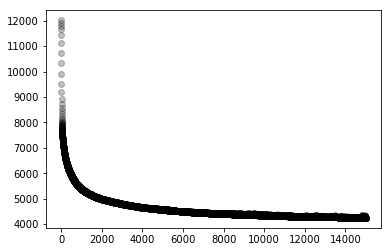

In [71]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [72]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(11959)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

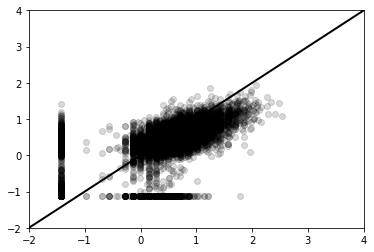

In [73]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 5.1 Validation Set Performance

In [74]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 2513.6831
[torch.FloatTensor of size 1]

In [75]:
# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
 0.3612
[torch.FloatTensor of size 1]

In [76]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(3987)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

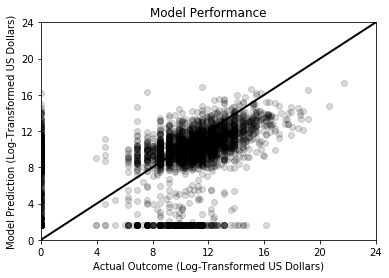

In [77]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [78]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.0824 -0.2716  0.0382  0.1720 -0.0496 -0.3783  0.3600  0.0414  0.0562  0.0041
-0.2098  0.1764  0.0683  0.1138  0.2095 -0.0552  0.1820  0.2173 -0.1157  0.0033
-0.1008 -0.1090 -0.0784  0.0400 -0.0438 -0.0587  1.1442  0.1387 -0.0906 -0.1297
 0.0706 -0.1652 -0.3168 -0.1278 -0.2764  0.0831 -0.3354 -0.1131 -0.1262  0.2262
-0.0858  0.1428 -0.0371  0.2244  0.3017 -0.3759 -0.1789 -0.0181  0.1233 -0.1238
 0.3040  0.1998  0.1190  0.0475 -0.0590  0.0830  0.3637 -0.0864 -0.0898  0.0653
-0.2101  0.2357 -0.0991  0.0660  0.0265  0.0486  0.4034  0.0026  0.1214  0.1138
-0.1681  0.1454  0.1813  0.0142  0.0309  0.0183 -0.9105 -0.1491  0.1175  0.0834
 0.0637 -0.0948  0.1277 -0.1599  0.2421 -0.0031 -0.3604  0.0652  0.0986  0.0061
 0.0512 -0.1662  0.0245 -0.1373 -0.0343  0.2028  0.1991 -0.1653  0.0787  0.1472
-0.1666  0.3004  0.1102  0.0554 -0.0637 -0.3025 -0.6738 -0.0045  0.0993 -0.0819
-0.1344  0.1497  0.0605  0.1842  0.0089 -0.2225 -0.3521  0.0953 -0.1464  0.2263
 

In [79]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.1569 -0.2375  0.0446  0.0518  0.0335 -0.0424  0.0990  0.0288 -0.3193  0.1806
 0.1625  0.3695 -0.1392  0.0931  0.4182  0.1539 -0.1207 -0.0652  0.1470  0.3670
 0.0224  0.0499  0.3454  0.4655 -0.1760  0.2902  0.2730  0.1235  0.4520 -0.4176
 0.2203  0.1532 -0.0979 -0.4025  0.2496  0.0585 -0.0978 -0.2180 -0.0420  0.3295
 0.1471  0.0686 -0.0826 -0.1894  0.1997 -0.2503 -0.0700 -0.3159 -0.1500 -0.4273
 0.5001  0.5083 -0.0315  0.2093 -0.0225  0.2889  0.2370 -0.0673  0.1374 -0.3647
-0.0978  0.0198  0.3881 -0.1157  0.1578 -0.0412  0.2669  0.1257  0.3423  0.2970
-0.0240 -0.0736  0.2750  0.0714 -0.2685  0.0467  0.0078  0.0013  0.3453 -0.4057
-0.3824 -0.3207  0.1725 -0.2919  0.4020  0.0084  0.1301  0.1325  0.1616  0.5644
 0.1661  0.2977 -0.0867  0.2707  0.0648  0.2787 -0.0549 -0.0778  0.2431 -0.1153
 0.3242  0.0947 -0.2351 -0.1644 -0.1603 -0.4484  0.1142  0.1250 -0.3885 -0.3333
 0.1996  0.4408 -0.1777 -0.3039 -0.0624  0.3603 -0.1542 -0.0796 -0.2888 -0.0422
 

In [80]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
-0.0952 -0.3917  0.2065 -0.6330 -0.7044  0.2630 -0.2262  0.2258 -0.5393 -0.4214
 0.2915 -0.1957  0.3287 -0.3275 -0.5225 -0.1188  0.0028  0.4414 -0.0456 -0.2647
 0.6495 -0.2793  0.0191 -0.3671 -0.7186 -0.0009  0.1862  0.3952 -0.0842 -0.0841
-0.4669 -0.1520 -0.2944  0.1670 -0.2953 -0.1862  0.2559 -0.1408  0.2654 -0.2217
-0.2461 -0.1360  0.2743 -0.4661 -0.3772  0.3143  0.2232  0.4047  0.1913  0.0259
-0.3405 -0.2985  0.3389 -0.1697 -1.5393 -0.3904 -0.1387  0.1057  0.3580 -0.8747
-0.6975  0.1534 -0.0961  0.2939 -0.3443  0.1806  0.0575 -0.2529  0.2412  0.2736
 0.3104  0.0677 -0.3824  0.3818  0.3946  0.2457 -0.2361 -0.1896  0.0500 -0.1564
-0.5046  0.3207  0.3119  0.2034 -0.5391  0.2977  0.1465 -0.2148 -0.0893  0.3530
 0.6859 -0.2615 -0.0219 -0.3543  0.0159  0.2275  0.2293  0.2410  0.2790 -0.0893

Columns 10 to 14 
-1.4065 -0.1145  0.0343  0.4213 -0.0871
-0.9927 -0.4506 -0.7319 -0.6141  0.3931
-0.7839 -0.5124 -0.8828 -0.6366  0.2789
 0.9459  0.2754  0.553

In [81]:
model[(6)].weight

Parameter containing:
 2.8276  0.4526  0.0380 -1.3051  0.0909 -0.9328 -1.9051 -0.7518 -0.9586  0.2857
-0.6935  0.5466  0.7684 -0.7113  0.1458  0.1508 -0.4270  1.2848 -0.2414  0.9286
 1.5176 -0.0297 -0.1984  0.0726  0.1412 -1.2450  0.1734 -0.2311  0.2008 -0.2141
-1.0527  0.7600  0.8144 -0.8206  0.1515  1.7397 -0.5747  1.5624 -0.2440  1.1582
-0.0918  0.5594  0.6797 -0.8390  0.2679  1.5462 -0.5124  1.6298 -0.3702  1.0423
 1.6469  0.0113 -0.6661  0.5767  0.4292 -1.0988  0.2980  0.2407  0.3897 -0.6276
 1.5076  0.0384 -0.4218  0.0623  0.1754 -1.8728  0.1137 -0.2064  0.2701 -0.2618
[torch.FloatTensor of size 7x10]

In [82]:
model[(8)].weight

Parameter containing:
-1.9322  0.1076 -1.5658  0.3387 -0.1909 -2.5788 -1.9294
 0.2002  0.0013  0.1630 -0.3364  0.1063 -0.0464 -0.3183
 1.3115 -1.2015  0.0386 -1.8047 -1.7590  0.1151  0.0266
 0.9367 -0.7486  0.2725 -1.3120 -1.4100  0.1096 -0.0653
 1.1090 -0.9906 -0.2488 -1.3049 -1.2746  0.0831  0.3852
[torch.FloatTensor of size 5x7]

In [83]:
model[(10)].weight

Parameter containing:
 3.5261 -0.1101  1.0897  1.0041  1.1807
[torch.FloatTensor of size 1x5]

## Round 6: Six-Hidden-Layer Neural Network

In [84]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [85]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(34, 23),
                            torch.nn.ReLU(),
                            torch.nn.Linear(23, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 10),
                            torch.nn.ReLU(),
                            torch.nn.Linear(10, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 5),
                            torch.nn.ReLU(),
                            torch.nn.Linear(5, 3),
                            torch.nn.ReLU(),
                            torch.nn.Linear(3, 1))

In [86]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

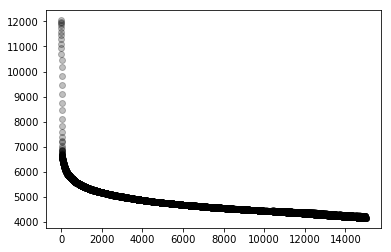

In [87]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [88]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(11959)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

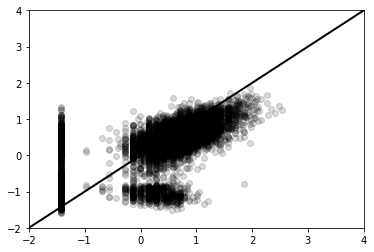

In [89]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 6.1: Validation Set Performance

In [90]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 2547.2598
[torch.FloatTensor of size 1]

In [91]:
# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
 0.3527
[torch.FloatTensor of size 1]

In [92]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(3987)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

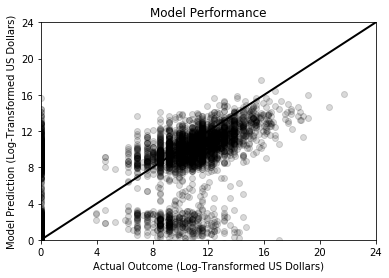

In [93]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [94]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.1246  0.1298  0.2900  0.2718 -0.3594  0.1490 -1.2659 -0.0535 -0.0689 -0.0040
 0.0566 -0.0762 -0.0742  0.0347  0.4440  0.0933  0.6242  0.1411 -0.0388 -0.3085
-0.3639 -0.2917 -0.2776 -0.0647 -0.0124  0.0299 -0.4678 -0.1231 -0.1188 -0.0518
 0.0394  0.0256  0.0635 -0.0242  0.2698  0.4386  0.3410 -0.0159 -0.0596  0.0434
-0.2162 -0.0666 -0.0707  0.0315 -0.0842  0.0817  0.7751  0.0599  0.0197  0.0527
 0.0074 -0.4668 -0.2000  0.2151  0.0819  0.2820  0.4373 -0.3433 -0.2376  0.1095
-0.3551 -0.0913  0.1074 -0.1038 -0.0580 -0.1471  0.0345  0.0242  0.1374 -0.0926
 0.0918  0.1146  0.0376  0.0036  0.3866 -0.1675  0.1063  0.0659 -0.0793  0.1000
-0.2100  0.0727  0.0274 -0.5973 -0.2380  0.3422 -0.2837  0.0530 -0.0994  0.1394
-0.1829  0.7845  0.2873 -0.0200  0.2930  0.3790  0.0040  0.2256  0.1586 -0.3057
 0.0832  0.2050 -0.3536 -0.1364 -0.4157  0.6012  0.4132  0.2677 -0.1921  0.1562
 0.2190 -0.1623 -0.1593 -0.1185 -0.2666  0.2637  0.9979 -0.1652  0.0320  0.0839
 

In [95]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.0517  0.2096  0.1193  0.0189 -0.0237  0.1672  0.1705  0.1393 -0.1092 -0.0431
-0.1159  0.2306  0.2032 -0.1130  0.2730  0.2406 -0.0724  0.0879  0.0861 -0.0663
-0.0119  0.0571 -0.1939 -0.3663  0.0090  0.3994 -0.0323  0.2990  0.1015  0.3885
-0.3342  0.2629  0.2561 -0.0152 -0.2435  0.1053 -0.3336 -0.0668 -0.0799 -0.1346
-0.0480  0.2316 -0.0309  0.3362  0.2290  0.2378 -0.0476  0.1527 -0.0763  0.3285
-0.2086  0.2727 -0.2442 -0.3601  0.1172 -0.0163  0.0512  0.3223  0.1244 -0.1306
-0.0666  0.2690  0.1835 -0.0650  0.2587  0.0293  0.0859  0.1120  0.2838 -0.1162
 0.1775  0.2345  0.2600  0.2664 -0.0923 -0.1462  0.1688 -0.0065  0.0876  0.1234
 0.0762  0.4115  0.5157  0.4265 -0.0494  0.0886 -0.3519  0.0023 -0.1304  0.3841
 0.0037  0.2893  0.1280  0.1865 -0.1330  0.0707  0.2597  0.1088  0.0070  0.4352
-0.1787 -0.1356 -0.2761  0.2100  0.2407  0.3659  0.0935  0.1696  0.0990  0.1777
-0.1327  0.3588 -0.0273  0.2356 -0.0076  0.0062  0.0564  0.1212 -0.1655  0.2553
 

In [96]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
 0.5562  0.0281 -0.1920  0.5958  0.2705 -0.2808 -0.0746  0.0798  0.7666  0.3598
 0.1234  0.1588 -0.2033  0.7651  0.3657 -0.1884  0.2927  0.0754  0.5888  0.2440
-0.5840  0.3077  0.4732 -0.6657 -0.1163  0.1845  0.2435  0.0849 -0.6721 -0.1054
 0.5645  0.2022 -0.2074  1.1952 -0.1624 -0.2769  0.2057 -0.2539  0.5473  0.4201
-0.4472  0.1616  0.4486 -0.6912 -0.1465  0.2805  0.4134 -0.0407 -0.8269 -0.1743
-0.3180  0.1742  0.3687 -0.8481  0.1340  0.1100 -0.0932 -0.3426 -0.4957  0.1692
 0.2620 -0.1502 -0.1400  0.5249  0.3733 -0.0610  0.0598  0.3504  0.7153  0.3659
-0.1821  0.0112  0.3065 -0.3823  0.2305  0.4020  0.2853 -0.2183 -0.6924 -0.1910
-0.1621 -0.0097  0.0472 -0.5399 -0.1138  0.1432  0.0816 -0.2483 -0.4103  0.2364
-0.1972  0.1065  0.4598 -0.5545  0.0371  0.3613  0.1269  0.1262 -0.8588 -0.1251

Columns 10 to 14 
-0.3889  0.4310  0.1629  0.0327  0.0234
-0.2594  0.2656  0.1605  0.1481 -0.4022
 0.3241 -0.0944  0.1400 -0.5123  0.1546
-0.6296  0.2356  0.156

In [97]:
model[(6)].weight

Parameter containing:
 0.2751  0.3304 -0.0041 -0.0382  0.2300 -0.2698  0.0370  0.2568 -0.0143 -0.0843
-0.2511  0.1726  0.0740  0.0554  0.0490  0.0534  0.3058  0.2027  0.1838  0.1265
 0.1076  0.2128  0.0068  0.3648  0.1841  0.2592 -0.1725  0.2504  0.3360  0.1517
 0.0507 -0.1830  0.0306 -0.2213 -0.2561  0.0893 -0.2225  0.2208 -0.3089  0.1972
 0.2699  0.4115 -0.7209  0.1684 -0.9433 -0.4268  0.3709 -0.3110 -0.3706 -1.0002
 0.2159 -0.0701 -0.0334 -0.2895 -0.1939  0.0112 -0.0663  0.1250 -0.3055 -0.3012
 0.1204 -0.3846 -0.1733  0.2111  0.0387 -0.0462 -0.2213 -0.0312  0.1849  0.1014
[torch.FloatTensor of size 7x10]

In [98]:
model[(8)].weight

Parameter containing:
-0.0530  0.0144 -0.1164 -0.2702 -0.3011 -0.0450  0.2808
-0.0136 -0.2227 -0.1301 -0.2804  0.1466  0.3505  0.3601
 0.0479  0.3273 -0.1823  0.0048  1.3379 -0.0503  0.3697
 0.3137  0.1836 -0.2400  0.1911  1.2349 -0.1405 -0.0378
 0.4812  0.1145  0.3026 -0.1766 -0.8336 -0.0895 -0.1597
[torch.FloatTensor of size 5x7]

In [99]:
model[(10)].weight

Parameter containing:
-0.0699  0.2809 -0.3604 -0.3250 -0.1929
-0.3569 -0.1344 -0.6972  0.8738  0.3083
-0.1231  0.4432 -1.4906 -0.8736  0.6054
[torch.FloatTensor of size 3x5]

In [100]:
model[(12)].weight

Parameter containing:
-0.0154 -0.5920  1.1439
[torch.FloatTensor of size 1x3]

## Round 7: Seven-Hidden-Layer Neural Network

In [101]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [102]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(34, 23),
                            torch.nn.ReLU(),
                            torch.nn.Linear(23, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 10),
                            torch.nn.ReLU(),
                            torch.nn.Linear(10, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 5),
                            torch.nn.ReLU(),
                            torch.nn.Linear(5, 3),
                            torch.nn.ReLU(),
                            torch.nn.Linear(3, 2),
                            torch.nn.ReLU(),
                            torch.nn.Linear(2, 1))

In [103]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

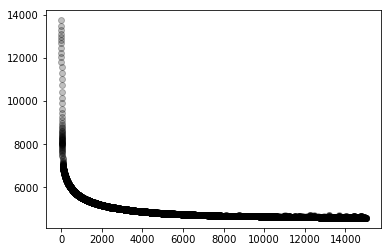

In [104]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [105]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(11959)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

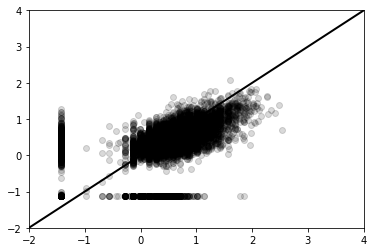

In [106]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 7.1: Validation Set Performance

In [107]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 2452.4331
[torch.FloatTensor of size 1]

In [108]:
# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
 0.3768
[torch.FloatTensor of size 1]

In [109]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(3987)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

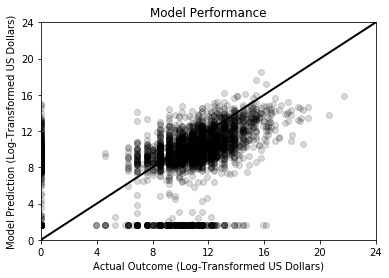

In [110]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [111]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.0669 -0.2040  0.0272  0.1280  0.0865  0.2265 -0.7656 -0.0718 -0.2184  0.6294
-0.2733  0.2880 -0.1213  0.1731 -0.1593  0.0658 -0.2163 -0.1342  0.1378  0.0598
 0.2345  0.0013 -0.2251 -0.1472 -0.0654 -0.1608 -0.1632 -0.2549  0.0778  0.0219
-0.3785  0.2161 -0.3752 -0.2166 -0.7802 -0.4599  0.4441  0.1944 -0.3443  0.0063
-0.1085 -0.0774 -0.0040  0.2831 -0.2950  0.0425  0.9202  0.2082 -0.1868 -0.0466
 0.3112  0.2095 -0.0825 -0.0518 -0.0064 -0.1454  0.9024 -0.0259 -0.2665  0.2566
-0.1115 -0.4475  0.0369  0.0113  0.0315 -0.4266 -1.0276  0.2748  0.0236  0.0342
-0.0469  0.4219  0.1587  0.3227  0.0595 -0.0512 -0.1439  0.0415  0.1655  0.2287
 0.0333 -0.3242  0.0175  0.1639 -0.2843 -0.5096  0.0523  0.1357 -0.0033  0.2738
-0.0834  0.3150 -0.1176  0.0273  0.2209  0.0042 -0.5419 -0.1621  0.3010 -0.2160
 0.4657 -0.2492 -0.0275 -0.0065 -0.1256 -0.0605 -0.5722  0.1426 -0.1843  0.1181
 0.0363 -0.0922 -0.1119 -0.1040 -0.2607  0.1795  0.7024  0.0482  0.1404  0.1530
 

In [112]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
-0.0754 -0.3025  0.1099  0.0583  0.1286  0.2495  0.1176  0.1303 -0.2836  0.0808
 0.0238 -0.5100  0.1855  0.3203 -0.0546 -0.0949  0.1219  0.0594 -0.5437  0.2208
-0.3173 -0.0816  0.1050  0.3720 -0.2005 -0.0633  0.3667  0.1192 -0.0723  0.3953
-0.2105 -0.2586 -0.0490  0.0120  0.2264  0.1372  0.3884  0.1679 -0.2833  0.0225
-0.2307 -0.1576  0.1208  0.2029 -0.0237  0.0268 -0.2942 -0.6968 -0.0991 -0.0808
-0.2767  0.2320  0.3240  0.3350  0.0211 -0.0582 -0.1195  0.0391  0.2730  0.0255
 0.0799 -0.0940  0.0557  0.3462  0.2397  0.1780  0.0774 -0.2234 -0.2876  0.0005
-0.2431  0.2280  0.4573  0.1830  0.1254 -0.2683 -0.0907 -0.1367  0.5036 -0.2331
 0.0498 -0.0746 -0.0662  0.1020  0.3232  0.3620  0.0647  0.0333 -0.1907  0.0012
-0.0362  0.2825  0.1264 -0.0483 -0.2069 -0.1749  0.0797  0.2165  0.2900 -0.0029
 0.3482 -0.2001  0.0736  0.0700  0.2997  0.2985  0.3508  0.2093 -0.2953  0.3220
-0.4167  0.2474  0.2793  0.3393  0.1394 -0.0863 -0.3636 -0.2149 -0.0298 -0.2410
 

In [113]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
 0.2488  0.5199  0.1994  0.3763 -0.4579 -0.2457  0.2898 -0.4145 -0.0234 -0.4325
 0.2004  0.1875  0.1671  0.2577 -0.2275 -0.0638  0.0864 -0.0432  0.3835 -0.1165
 0.3397  0.0488  0.3448  0.1640 -0.4354 -0.1990  0.1681 -0.0419 -0.0600 -0.4925
-0.6990 -0.0934 -0.5732 -0.2836  0.5316  0.2756 -0.0902  0.2756 -0.2035  0.2146
-0.4055  0.3728  0.1636  0.0875 -0.0239 -0.2086 -0.1087  0.2169  0.1630  0.2078
-0.6890 -0.2038 -0.6319 -0.3344  0.4535  0.4191  0.3139  0.2968  0.0493  0.2573
-0.9293 -0.4951 -0.6691  0.8372 -0.9709  0.9761 -1.3942 -0.5322  0.4328 -0.4639
-0.6428 -0.5497 -0.0872 -0.3260  0.3056  0.2966  0.0429  0.4603  0.2190  0.6071
 0.2731  0.4228  0.4062  0.7720 -0.4535 -0.3712  0.2403 -0.3134  0.1042 -0.2013
-1.2526 -0.4898 -0.5350  0.1916  0.2484  0.1275 -0.2252  0.0611 -0.3229  0.1798

Columns 10 to 14 
 0.3083 -0.2621  0.3530  0.2457  0.1329
 0.3015 -0.3353  0.2379  0.3427 -0.0145
 0.0446  0.3087 -0.2078  0.0719  0.0921
 0.0174  0.1006  0.219

In [114]:
model[(6)].weight

Parameter containing:
 0.3718  0.3552 -0.4322 -0.9738  0.2602 -0.2203 -1.0664 -0.4186 -0.1470 -0.8241
 0.0589  0.1809 -0.2392 -0.5406  0.3343 -0.2560 -0.4727 -0.2821  0.4005 -0.2502
-0.4509 -0.1776 -0.2646  0.7040  0.1238  0.4580 -0.0901  0.1878 -0.4687  0.6811
 0.2817  0.2690 -1.0013 -0.4703  0.2455  0.2222 -1.1884  0.2905 -0.0742 -1.1092
 0.3525 -0.0736 -0.9322 -0.6789  0.2785  0.5678 -1.0513  0.1722  0.0432 -0.7869
-0.3926 -0.1751 -0.6174  0.7335  0.0908  0.5380 -0.9779  0.5195 -0.7870  1.1931
 0.0910 -0.0856  0.1572  0.2829 -0.3002 -0.3133  0.1612  0.0739 -0.0143  0.0868
[torch.FloatTensor of size 7x10]

In [115]:
model[(8)].weight

Parameter containing:
-0.3936  0.2473  0.0359 -0.5949 -1.4793 -0.1048 -0.2798
-0.0007 -0.3298  0.6619  0.4775  0.5331  1.0449  0.2973
 0.3808  0.2937 -1.2971  0.0389  0.5074 -0.7178  0.0245
-0.1817 -0.2430  0.1839 -0.3813 -0.3661  0.1359  0.0265
 0.4248 -0.0108 -1.6292  0.2641  0.2269 -1.0057  0.2400
[torch.FloatTensor of size 5x7]

In [116]:
model[(10)].weight

Parameter containing:
 1.3268  0.6607 -0.2805 -0.3136 -1.2265
-0.3071 -0.3675  0.2008  0.4064  0.1529
-1.6737 -0.0157  0.6293  0.1493  0.5425
[torch.FloatTensor of size 3x5]

In [117]:
model[(12)].weight

Parameter containing:
-1.4626 -0.0317  0.5787
-0.4274  0.3653 -0.1867
[torch.FloatTensor of size 2x3]

In [118]:
model[(14)].weight

Parameter containing:
 1.0563  0.0037
[torch.FloatTensor of size 1x2]

## Round 8: Linear Regression

In [119]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [120]:
# Make the neural network - really a regression
model = torch.nn.Sequential(torch.nn.Linear(34, 1))

In [121]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(15000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

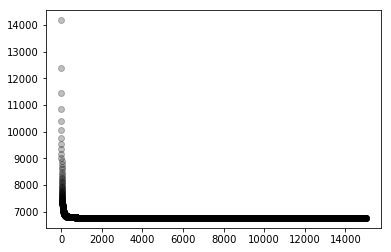

In [122]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors, c = "black", alpha = 0.25)

In [123]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(11959)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

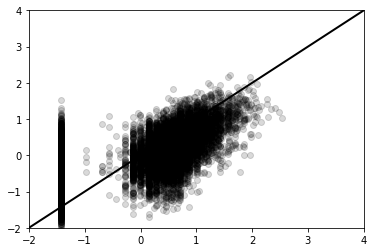

In [124]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 8.1: Validation Set Performance

In [125]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 2373.0332
[torch.FloatTensor of size 1]

In [126]:
# Grab the residual sum of squares
resid_sum_squares = loss_fn(y_valid_pred, valid_outcomes_Variable)


# Compute R squared
R_squared = 1 - (resid_sum_squares / tot_sum_squares)

R_squared

Variable containing:
 0.3969
[torch.FloatTensor of size 1]

In [127]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(3987)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Convert back to log scale
y_valid_pred_array = y_valid_pred_array*5.407597 + 7.688844


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

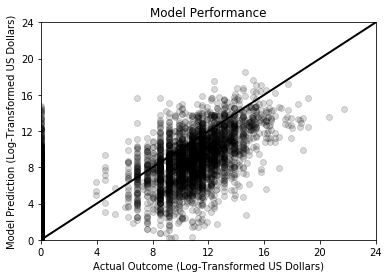

In [128]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([0, 24])

axes.set_ylim([0, 24])

axes.set_xticks([0, 4, 8, 12, 16, 20, 24])

axes.set_yticks([0, 4, 8, 12, 16, 20, 24])

plt.plot([0, 24], [0, 24], 'k-', lw = 2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [129]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.0358 -0.0263  0.0894  0.1530  0.1987 -0.2062  0.0315 -0.0161 -0.0407 -0.0090

Columns 10 to 19 
-0.0516  0.0537  0.0033 -0.0069  0.0652 -0.0189 -0.0151 -0.0454  0.0513  0.0204

Columns 20 to 29 
 0.0076  0.0259 -0.0582  0.0223  0.0524 -0.0231  0.1851  0.0636  0.0218  0.1732

Columns 30 to 33 
-0.0311  0.0160  0.0755  0.0240
[torch.FloatTensor of size 1x34]